In [1]:
from mdu.vqr.cpflow.core_flow import CPFlowOrdering

device = "cuda:0"

cpflow = CPFlowOrdering(
    feature_dimension=2,
    hidden_dim=8,
    num_hidden_layers=5,
    nblocks=4,
    zero_softplus=False,
    softplus_type="softplus",
    symm_act_first=False,
)

cpflow = cpflow.to(device)

/home/nkotelevskii/github/multidimensional_uncertainty/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


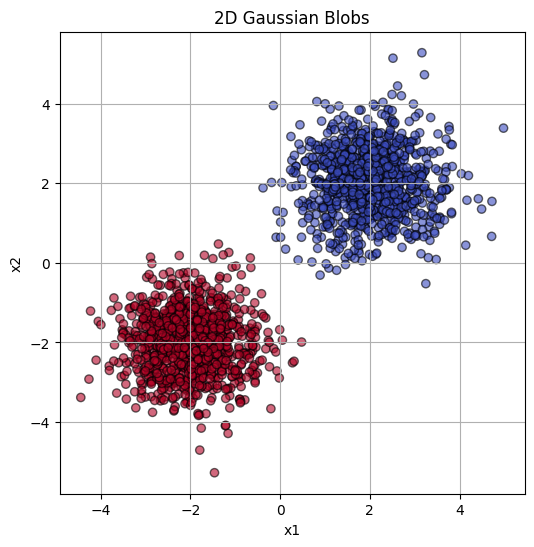

In [2]:
import torch
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(0)

# Parameters for blobs
n_samples = 1000
centers = torch.tensor([[2.0, 2.0], [-2.0, -2.0]])
std = 0.8

# Generate samples for each blob
X0 = torch.randn(n_samples, 2) * std + centers[0]
X1 = torch.randn(n_samples, 2) * std + centers[1]

# Stack and create labels
X = torch.cat([X0, X1], dim=0)
y = torch.cat([torch.zeros(n_samples), torch.ones(n_samples)])

# Visualize
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", alpha=0.6, edgecolor="k")
plt.title("2D Gaussian Blobs")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

In [3]:
X = X.to(torch.float32).to("cuda:0")

train_loader = torch.utils.data.DataLoader(
    X,
    batch_size=32,
    shuffle=True,
)

In [4]:
cpflow.fit(
    train_loader=train_loader,
    train_params={
        "lr": 1e-2,
        "num_epochs": 15,
        "batch_size": 32,
    },
)

  0%|          | 0/15 [00:00<?, ?it/s]

init loss: -3.031120777130127
10 -2.785807228088379
20 -5.3945979356765745
30 -7.876634693145752
40 -10.192280030250549
50 -12.404393446445464
60 -14.407793712615966


  7%|▋         | 1/15 [00:10<02:21, 10.10s/it]

70 -16.34867795705795
80 -18.084050607681274
90 -19.783561086654665
100 -21.417030370235445
110 -22.9351725935936
120 -24.453710746765136


 13%|█▎        | 2/15 [00:19<02:09,  9.96s/it]

130 -25.86285467147827
140 -27.33829151391983
150 -28.674056077003478
160 -29.94461326599121
170 -31.356518578529357
180 -32.528929740190506


 20%|██        | 3/15 [00:29<01:59,  9.98s/it]

190 -33.78704473376274
200 -34.93567579388618
210 -36.05003926157951
220 -37.23246127963066
230 -38.2134651362896
240 -39.27001776099205
250 -40.22566378712654


 27%|██▋       | 4/15 [00:39<01:49,  9.99s/it]

260 -41.10222697854042
270 -41.991259998083116
280 -42.822999119758606
290 -43.62554122805595
300 -44.45126139223576
310 -45.17043381333351


 33%|███▎      | 5/15 [00:49<01:39,  9.99s/it]

320 -45.93345499038696
330 -46.66876748204231
340 -47.36699272096157
350 -47.88216866403818
360 -48.586147874593735
370 -49.13754152059555


 40%|████      | 6/15 [00:59<01:29,  9.99s/it]

380 -49.73007602691651
390 -50.420522570610046
400 -50.96025267541408
410 -51.524482160806656
420 -52.088673955202104
430 -52.67750964164734


 47%|████▋     | 7/15 [01:09<01:19, 10.00s/it]

440 -53.19993317872286
450 -53.873601539433004
460 -54.250774970650674
470 -54.954540100693706
480 -55.453195336461064
490 -55.93170448243618
500 -56.48164245262742


 53%|█████▎    | 8/15 [01:19<01:10, 10.00s/it]

510 -56.94131178632379
520 -57.45292928889394
530 -57.88661423549056
540 -58.25810829550028
550 -58.672616347670555
560 -59.07119733542204


 60%|██████    | 9/15 [01:29<00:59,  9.96s/it]

570 -59.48022555038333
580 -59.77631817907095
590 -60.13074783533811
600 -60.41616856530309
610 -60.78484169766307
620 -61.0947287812829


 67%|██████▋   | 10/15 [01:39<00:49,  9.94s/it]

630 -61.359842915833
640 -61.74285027682781
650 -62.05324654132128
660 -62.2110259860754
670 -62.566363987326625
680 -62.85488763451576
690 -63.07987625002861


 73%|███████▎  | 11/15 [01:49<00:39,  9.93s/it]

700 -63.34338584691286
710 -63.67883048355579
720 -63.933719085156916
730 -64.21179308444262
740 -64.47536792457103
750 -64.75878883451223


 80%|████████  | 12/15 [01:59<00:29,  9.95s/it]

760 -64.93043004572391
770 -65.10113458260894
780 -65.49160609617829
790 -65.72506568580866
800 -65.99561458677053
810 -66.22040681242943


 87%|████████▋ | 13/15 [02:09<00:19,  9.96s/it]

820 -66.3549333229661
830 -66.57100599333644
840 -66.82917258962989
850 -67.08884286433458
860 -67.3908688493073
870 -67.573686170578
880 -67.85369424670935


 93%|█████████▎| 14/15 [02:19<00:09,  9.98s/it]

890 -68.07255497872829
900 -68.25685412138701
910 -68.45893333889543
920 -68.73884772099555
930 -68.97713027261197
940 -69.2464038271457


100%|██████████| 15/15 [02:29<00:00,  9.98s/it]


CPFlowOrdering(
  (flow): SequentialFlow(
    (flows): ModuleList(
      (0): ActNorm(2)
      (1): DeepConvexFlow(
        ConjGrad(rtol=0.0, atol=0.001)
        (icnn): ICNN3(
          (act): Softplus()
          (Wzs): ModuleList(
            (0): Linear(in_features=2, out_features=8, bias=True)
            (1-4): 4 x PosLinear(in_features=8, out_features=4, bias=True)
            (5): PosLinear(in_features=8, out_features=1, bias=False)
          )
          (Wxs): ModuleList(
            (0-3): 4 x Linear(in_features=2, out_features=4, bias=True)
            (4): Linear(in_features=2, out_features=1, bias=False)
          )
          (Wx2s): ModuleList(
            (0-3): 4 x Linear(in_features=2, out_features=4, bias=True)
          )
          (actnorms): ModuleList(
            (0-3): 4 x ActNormNoLogdet(4)
            (4): ActNormNoLogdet(1)
          )
        )
      )
      (2): ActNorm(2)
      (3): DeepConvexFlow(
        ConjGrad(rtol=0.0, atol=0.001)
        (icnn): IC

In [5]:
# Sample from 2D standard Gaussian
n_samples_gauss = 1000
gauss_samples = torch.randn(n_samples_gauss, 2, device=device)

In [6]:
with torch.no_grad():
    cpflow.flow.eval()
    for f in cpflow.flow.flows[1::2]:
        f.no_bruteforce = False
    z = cpflow.flow.reverse(gauss_samples)
    pushforward_of_u = z.cpu()

/home/nkotelevskii/github/multidimensional_uncertainty/mdu/vqr/cpflow/cpflows.py:219: UserWarning: brute force
  warnings.warn("brute force")


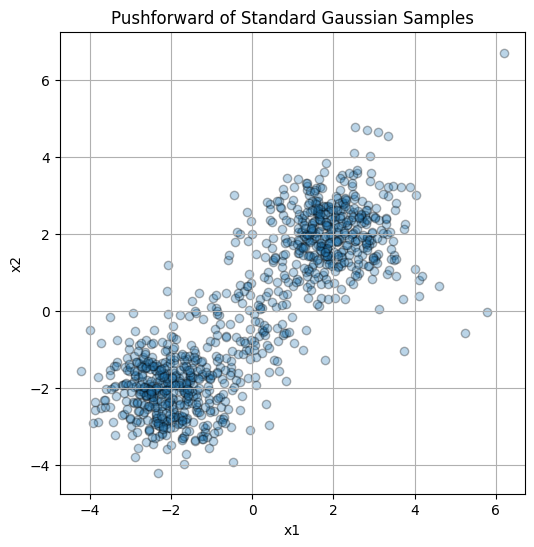

In [7]:
plt.figure(figsize=(6, 6))
plt.scatter(pushforward_of_u[:, 0], pushforward_of_u[:, 1], alpha=0.3, edgecolor="k")
plt.title("Pushforward of Standard Gaussian Samples")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

In [8]:
with torch.no_grad():
    cpflow.flow.eval()
    for f in cpflow.flow.flows[1::2]:
        f.no_bruteforce = False
    z_, _ = cpflow.flow.forward_transform(
        torch.tensor(X.to("cuda:0"), dtype=torch.float32),
        context=None,
    )
    pushforward_of_u = z_.cpu()

/tmp/ipykernel_3926250/3041039001.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(X.to("cuda:0"), dtype=torch.float32),


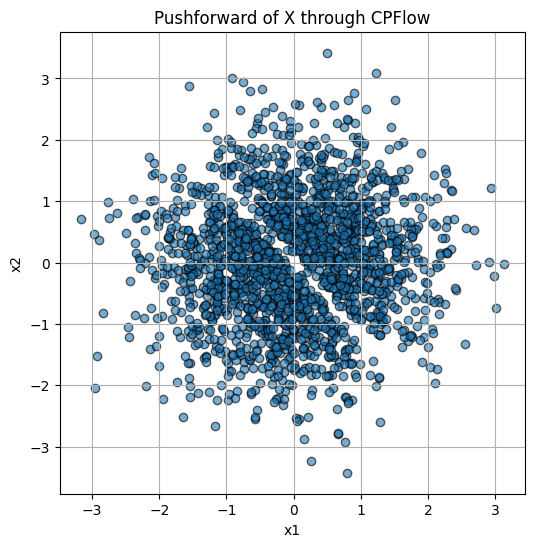

In [9]:
plt.figure(figsize=(6, 6))
plt.scatter(pushforward_of_u[:, 0], pushforward_of_u[:, 1], alpha=0.6, edgecolor="k")
plt.title("Pushforward of X through CPFlow")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()